In [87]:
import pandas as pd

In [88]:
dataset=pd.read_csv("/content/Project 1 - Weather Dataset (1).csv")

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [90]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [65]:
dataset["Weather"].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [91]:
def map_weather_keywords(w):
    w = w.lower()
    if 'clear' in w:
        return 'Clear'
    elif 'cloudy' in w:
        return 'Cloudy'
    elif 'rain' in w or 'drizzle' in w or 'shower' in w:
        return 'Rain'
    elif 'snow' in w or 'pellet' in w:
        return 'Snow'
    elif 'fog' in w or 'haze' in w:
        return 'Fog/Mist/Haze'
    elif 'thunder' in w:
        return 'Thunderstorm'
    elif 'freezing' in w or 'ice' in w:
        return 'Ice/Freezing'
    else:
        return 'Other'

dataset['Weather_Category'] = dataset['Weather'].apply(map_weather_keywords)
display(dataset['Weather_Category'].value_counts())

,count
Weather_Category,
Cloudy,3797
Clear,3432
Rain,919
Snow,464
Fog/Mist/Haze,170
Thunderstorm,2


In [92]:
ind=dataset[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [94]:
from sklearn import tree

In [95]:
clf = tree.DecisionTreeClassifier()

In [96]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
y_pred=clf.predict(X_test)

In [98]:
from sklearn.metrics import classification_report

In [99]:
cls=classification_report(y_test, y_pred)

In [100]:
# Select only numerical columns
print(cls)

               precision    recall  f1-score   support

        Clear       0.66      0.66      0.66       665
       Cloudy       0.65      0.65      0.65       772
Fog/Mist/Haze       0.63      0.70      0.67        37
         Rain       0.53      0.52      0.52       178
         Snow       0.73      0.66      0.69       105

     accuracy                           0.64      1757
    macro avg       0.64      0.64      0.64      1757
 weighted avg       0.64      0.64      0.64      1757



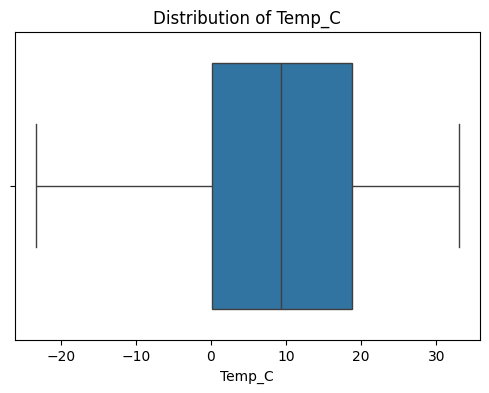

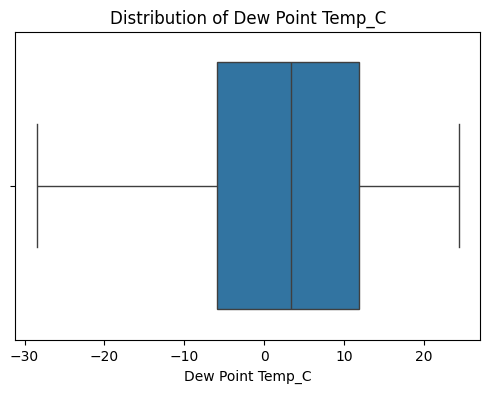

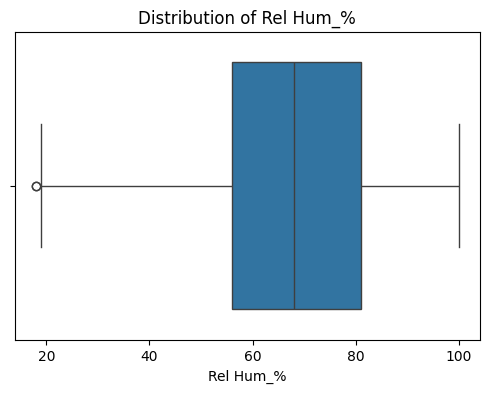

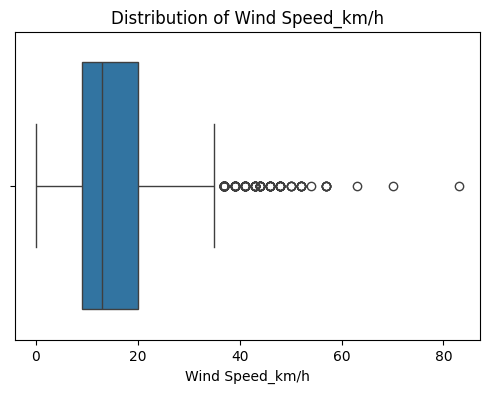

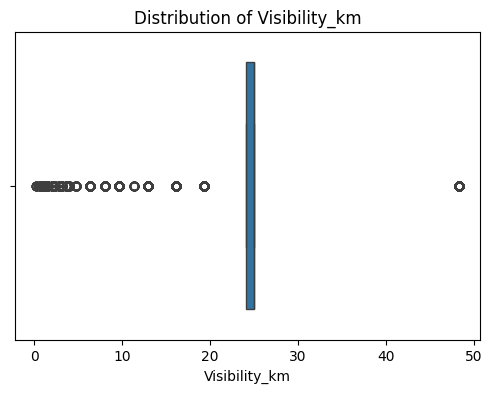

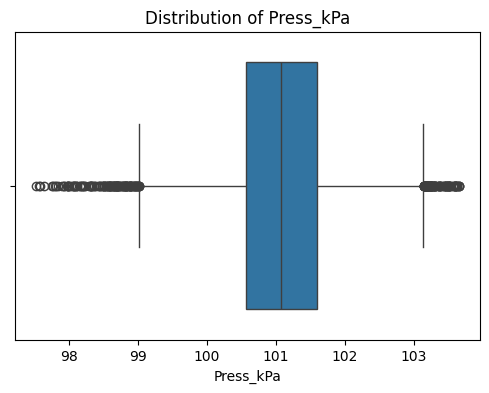

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in dataset.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=dataset[col])
    plt.title(f"Distribution of {col}")
    plt.show()

Here are some codes to visualize the distribution of the numerical columns and check for normality.

In [102]:
# For Visibility_km
Q1_vis = dataset['Visibility_km'].quantile(0.25)
Q3_vis = dataset['Visibility_km'].quantile(0.75)
IQR_vis = Q3_vis - Q1_vis
l_vis = Q1_vis - 1.5 * IQR_vis
u_vis = Q3_vis + 1.5 * IQR_vis

# For Wind Speed_km/h
Q1_ws = dataset['Wind Speed_km/h'].quantile(0.25)
Q3_ws = dataset['Wind Speed_km/h'].quantile(0.75)
IQR_ws = Q3_ws - Q1_ws
l_ws = Q1_ws - 1.5 * IQR_ws
u_ws = Q3_ws + 1.5 * IQR_ws

Q1 = dataset['Press_kPa'].quantile(0.25)
Q3 = dataset['Press_kPa'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR




In [103]:
import numpy as np

# Replace (cap) values outside bounds
dataset['Visibility_km'] = np.where(dataset['Visibility_km'] < l_vis, l_vis,
                           np.where(dataset['Visibility_km'] > u_vis, u_vis, dataset['Visibility_km']))

dataset['Wind Speed_km/h'] = np.where(dataset['Wind Speed_km/h'] < l_ws, l_ws,
                             np.where(dataset['Wind Speed_km/h'] > u_ws, u_ws, dataset['Wind Speed_km/h']))

dataset['Press_kPa'] = np.where(dataset['Press_kPa'] < lower, lower,np.where(dataset['Press_kPa'] > upper, upper,
                        dataset['Press_kPa']))


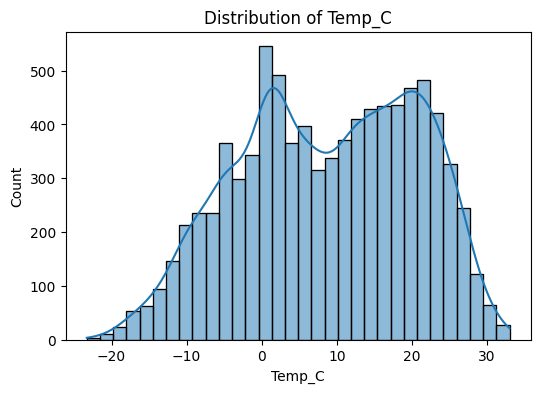

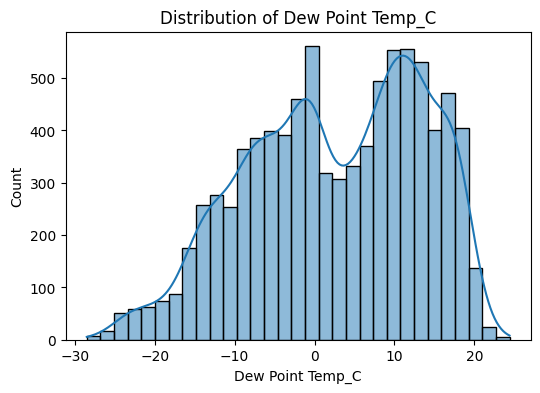

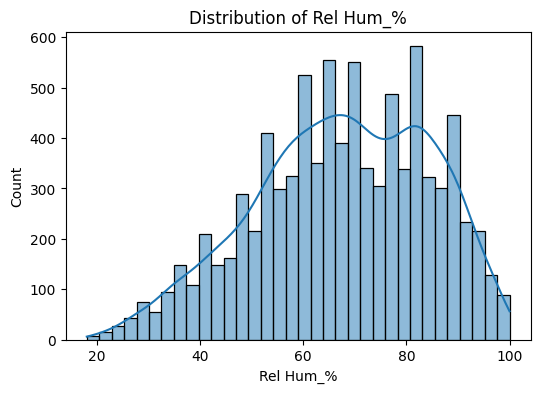

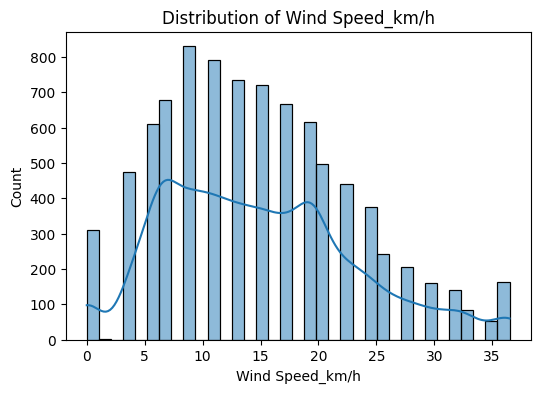

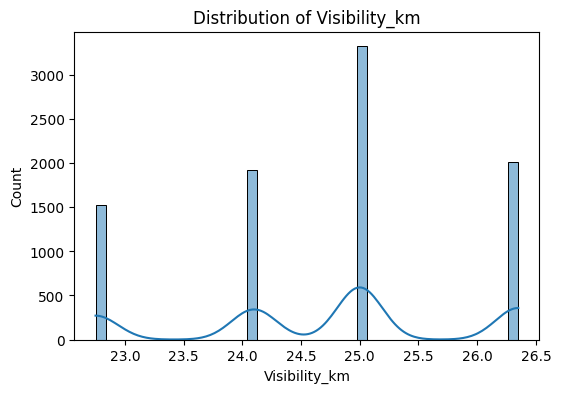

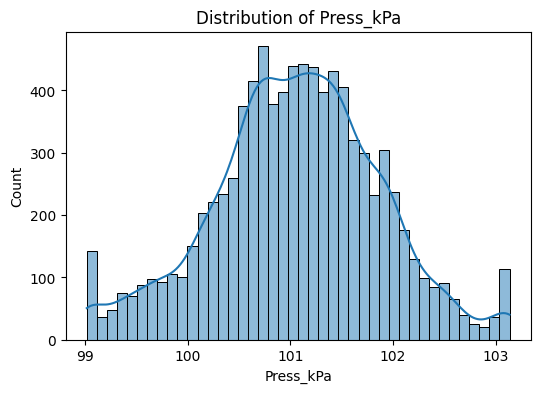

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in dataset.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [105]:
# Check skewness for all numeric columns
dataset.skew(numeric_only=True)


,0
Temp_C,-0.177666
Dew Point Temp_C,-0.318433
Rel Hum_%,-0.323830
Wind Speed_km/h,0.529433
Visibility_km,-0.234436
Press_kPa,-0.096768


In [114]:
import numpy as np

# Copy dataset before transformation
df = dataset.copy()

df["Wind Speed_km/h_sqrt"] = np.sqrt(df["Wind Speed_km/h"])
df["Temp_C_sqrt"] = np.sqrt(df["Temp_C"])
df["Dew Point Temp_C_sqrt"] = np.sqrt(df["Dew Point Temp_C"])
df["Rel Hum_%_sqrt"] = np.sqrt(df["Rel Hum_%"])
df["Visibility_km_sqrt"] = np.sqrt(df["Visibility_km"])
df["Press_kPa_sqrt"] = np.sqrt(df["Press_kPa"])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


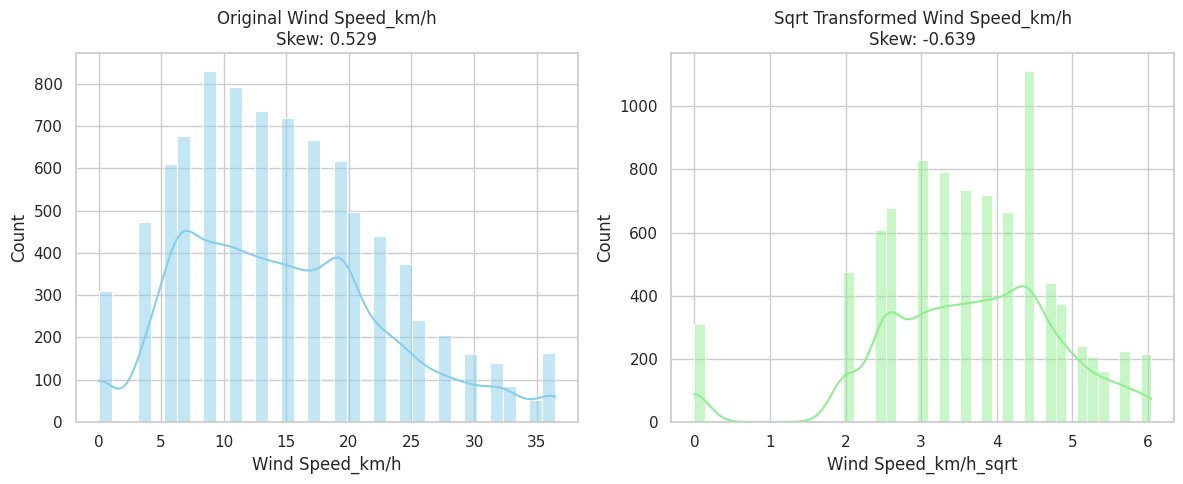

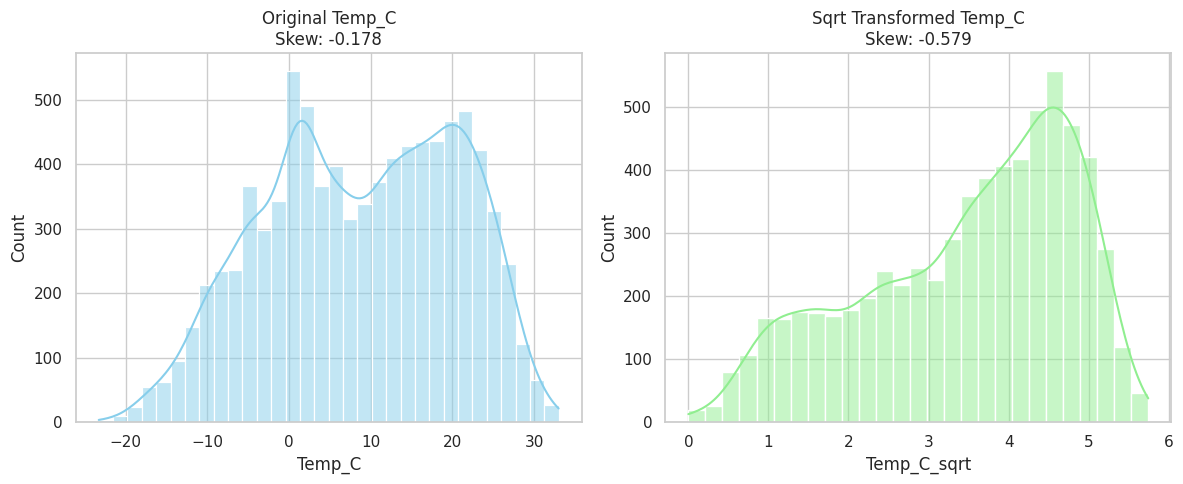

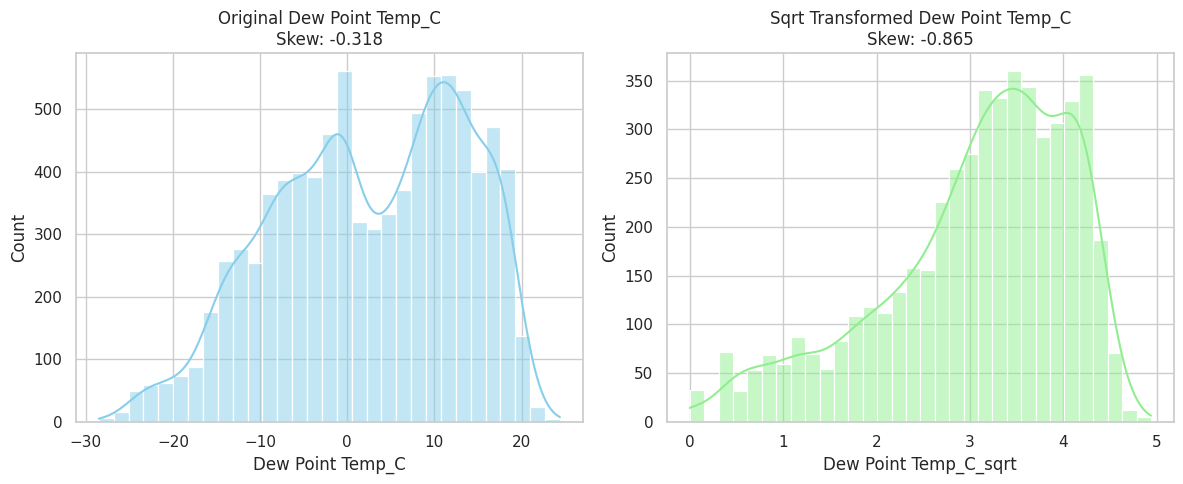

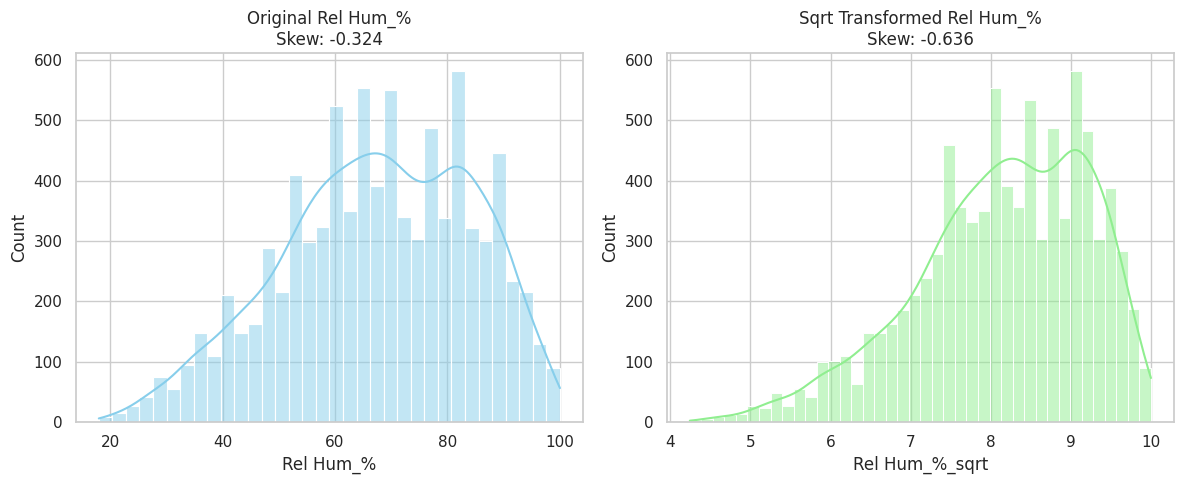

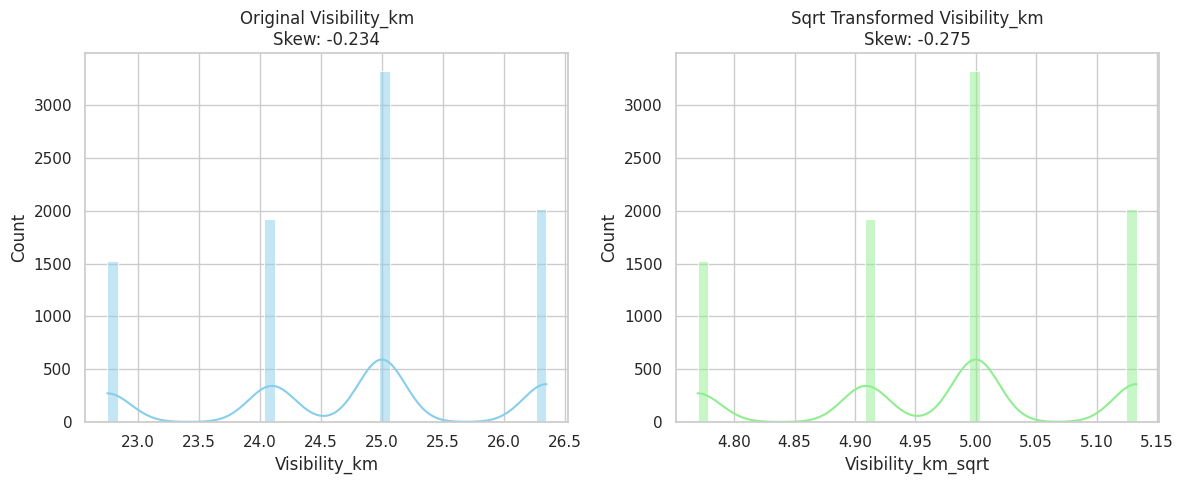

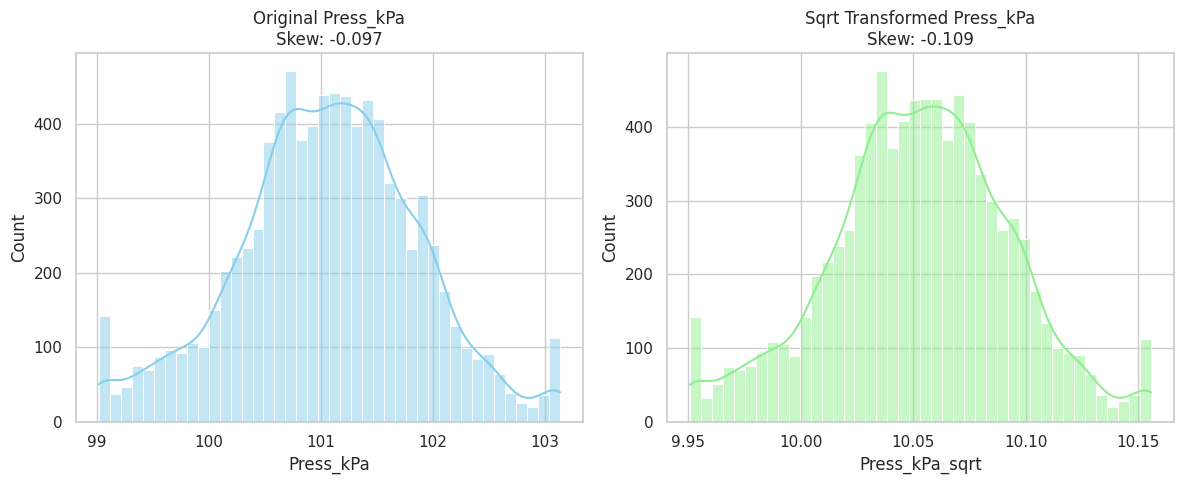

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_original_vs_sqrt(dataset, df, columns):
    sns.set(style="whitegrid")
    for col in columns:
        plt.figure(figsize=(12,5))

        # Original
        plt.subplot(1, 2, 1)
        sns.histplot(dataset[col], kde=True, color="skyblue")
        plt.title(f"Original {col}\nSkew: {dataset[col].skew():.3f}")

        # Square root transformed
        plt.subplot(1, 2, 2)
        sns.histplot(df[f"{col}_sqrt"], kde=True, color="lightgreen")
        plt.title(f"Sqrt Transformed {col}\nSkew: {df[f'{col}_sqrt'].skew():.3f}")

        plt.tight_layout()
        plt.show()

# List of columns you transformed
cols = ["Wind Speed_km/h", "Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Visibility_km", "Press_kPa"]

plot_original_vs_sqrt(dataset, df, cols)
